# <center><em>Heart Disease Prediction Model  

A Classification Model that can predict whether or not a person has a heart disease based on physical features of that person (age,sex, cholesterol, etc...)
Project by: <a href='http://www.pieriandata.com'>www.pieriandata.com

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 ----

## Reading Data

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0], dtype=int64)

 ----
 
## Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


----

## Data Visualization Tasks

<AxesSubplot:xlabel='target', ylabel='count'>

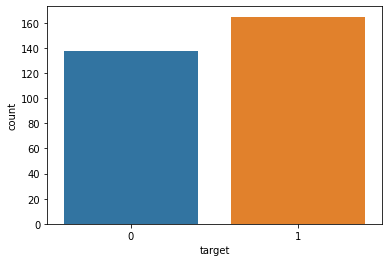

In [8]:
sns.countplot(x='target', data=df)

**The above plot signifies that our data's classes are not imbalanced and will probably not cause accuracy paradox!**

---

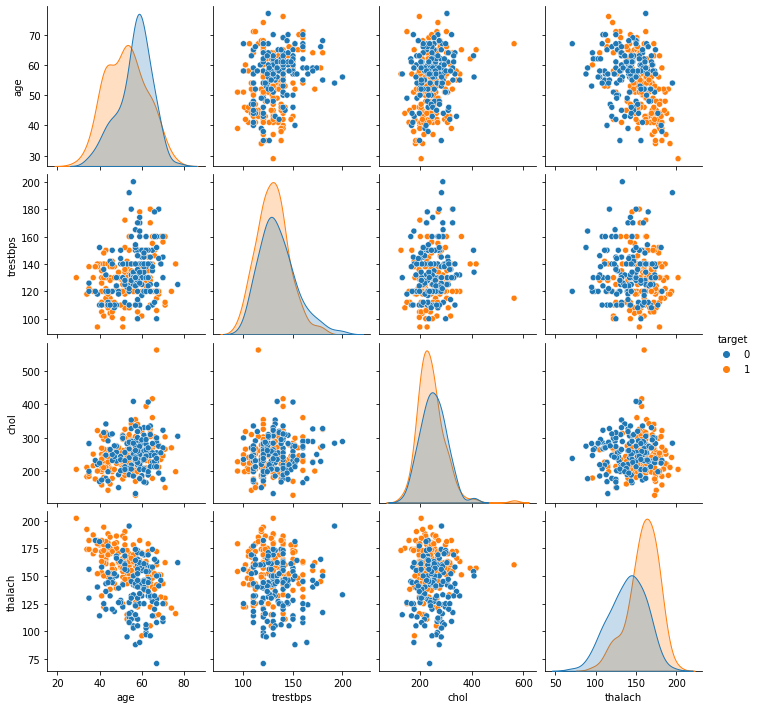

In [9]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

**The pairplot states a good relation between the features & target label to be predicted! So far so good!**

---

<AxesSubplot:>

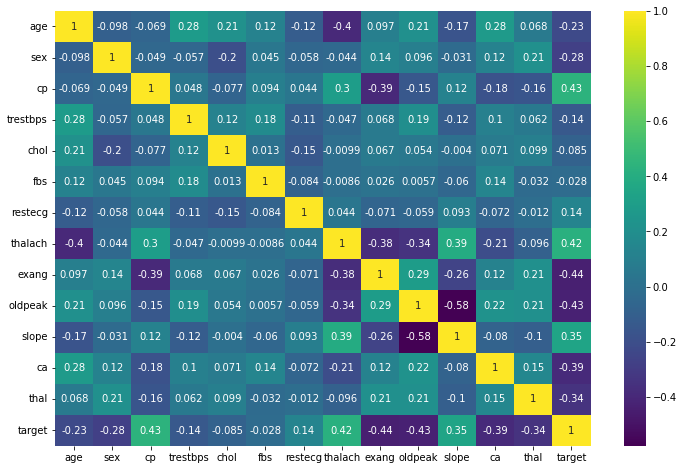

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis',annot=True)

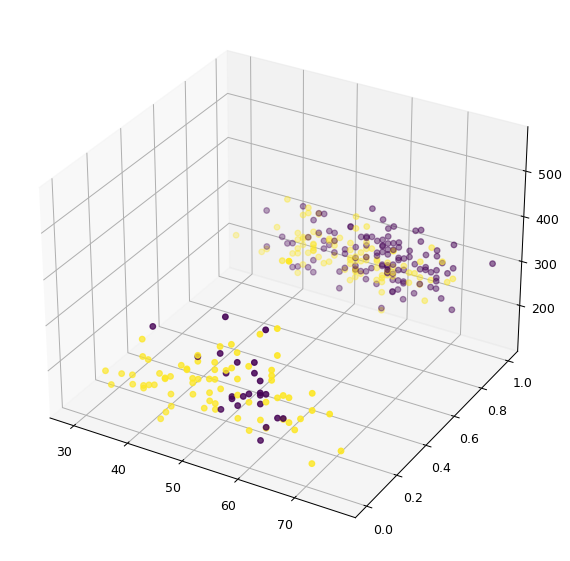

In [11]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,8), dpi=90)
ax = fig.add_subplot(111, projection='3d')
colors = df['target']
ax.scatter(df['age'],df['sex'],df['chol'],c=colors);

----
----

# Machine Learning

## Train | Test Split and Scaling

**Separating the features from the labels into 2 objects, X and y.**

In [12]:
X = df.drop('target', axis=1)
y = df['target']

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Creating a StandardScaler object and normalizing the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**Creating a Logistic Regression model and using Cross-Validation to find a well-performing C value for the hyper-parameter search. We have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to us!**

In [17]:
from sklearn.linear_model import LogisticRegressionCV 

In [18]:
log_model = LogisticRegressionCV()

In [19]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

**Reporting back the search's optimal parameters, specifically the C value!** 

In [20]:
log_model.C_

array([0.04641589])

In [21]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

**Reporting back the model's coefficients!**

In [22]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**Create a visualization of the coefficients by using a barplot of their values, using a combination of pandas and seaborn!**

In [23]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [24]:
coefs = coefs.sort_values()

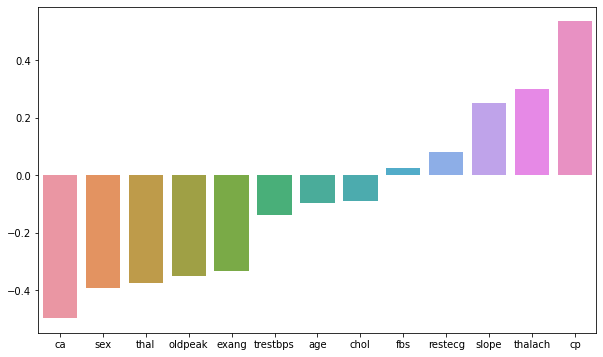

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

---------

## Model Performance Evaluation!

**Let's now evaluate our model on the remaining 10% of the data, the test set!**

**Creating the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(scaled_X_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

e:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


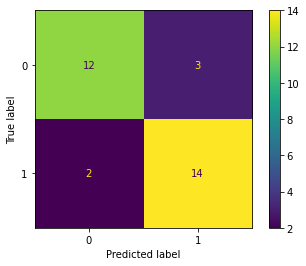

In [28]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**Creating both the precision recall curve and the ROC Curve!**

In [30]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

e:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


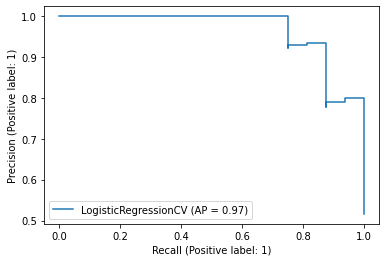

In [31]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

e:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


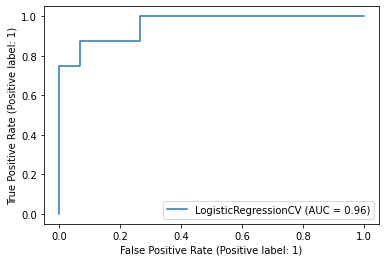

In [32]:
plot_roc_curve(log_model,scaled_X_test,y_test)


**Final check: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Now, let's check what does our model predict for this patient? Do they have heart disease? How "sure" is our model of this prediction?**

In [33]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [34]:
log_model.predict(patient)

array([0], dtype=int64)

In [35]:
samp_pred

NameError: name 'samp_pred' is not defined

In [36]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])

In [37]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)

**This mean the probability of the patient belonging to the 0-class is 0.999999862!**

----

## Thank You!